In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [23]:
dat = pd.read_csv("profile.csv", header=None, names=["TraceTime", "SourceTime", "ExecTime", "PluginName"])
dat_n = dat.groupby("PluginName")["ExecTime"].sum().reset_index()
dat_n_sorted = dat_n.sort_values("ExecTime", ascending=True)

dat_s = dat.groupby("PluginName")["SourceTime"].sum().reset_index()
dat_s_sorted = dat_s.sort_values("SourceTime", ascending=True)

top_10 = dat_n_sorted.head(10)

dat_n_sorted.to_csv("results.csv",index = False)
top_10.style.background_gradient() 

,PluginName,ExecTime
18,pandoc-syntax-check.vim,0.017000
23,treesitter-context.vim,0.024000
5,cmp_nvim_lsp.lua,0.051000
20,plenary.vim,0.052000
4,cmp_buffer.lua,0.063000
6,cmp_nvim_lua.lua,0.066000
17,nvim-web-devicons.vim,0.078000
12,lsp-zero.vim,0.107000
7,cmp_path.lua,0.131000
15,luasnip.vim,0.147000


In [4]:
dat["PluginName"].unique()

array(['pandoc.vim', 'luasnip.vim', 'luasnip.lua', 'auto-pairs.vim',
       'activitywatch.vim', 'lsp-zero.vim', 'cmp.lua', 'lspconfig.lua',
       'nvim-treesitter.lua', 'treesitter-context.vim',
       'nvim-web-devicons.vim', 'plenary.vim', 'telescope.lua',
       'undotree.vim', 'boxdraw.vim', 'dadbod.vim', 'db_ui.vim',
       'pandoc-syntax-check.vim', 'rsi.vim', 'vim_current_word.vim',
       'cmp_buffer.lua', 'cmp_nvim_lsp.lua', 'cmp_nvim_lua.lua',
       'cmp_path.lua', 'gruvbox_material.vim', 'gruvbox-material.vim'],
      dtype=object)

## Correlation between source time, trace time, execution time of plugins

<Axes: >

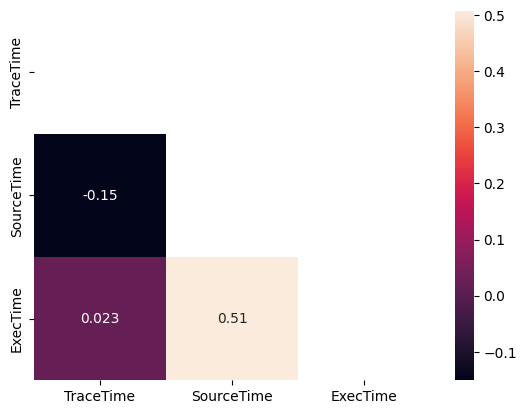

In [5]:
corr_mat = dat.select_dtypes(include='float64').corr()
mask  = np.triu(np.ones_like(corr_mat))
sns.heatmap(data = corr_mat, annot=True, mask = mask)

## Distribution of source time, trace time, execution time of plugins

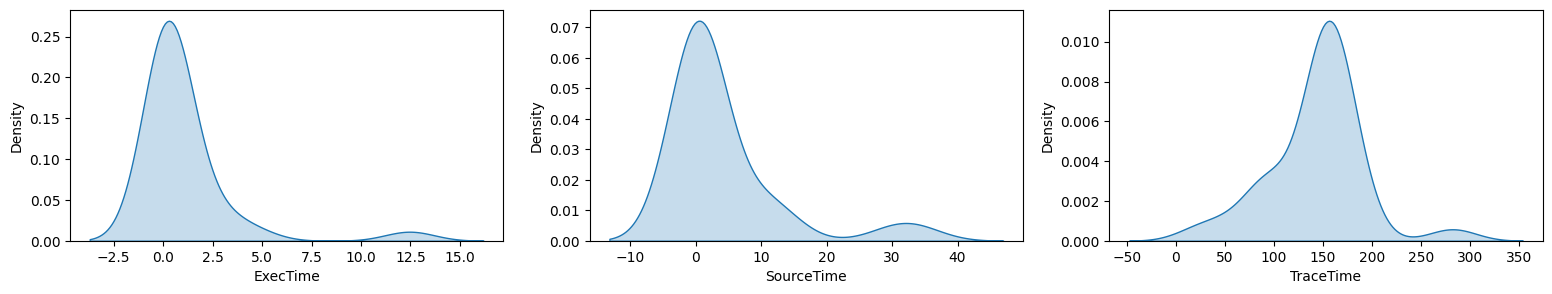

In [41]:
fig, ax = plt.subplots(1,3,figsize=(19,3))
sns.kdeplot(dat['ExecTime'], fill = True, ax=ax[0])
sns.kdeplot(dat['SourceTime'], fill = True, ax=ax[1])
sns.kdeplot(dat['TraceTime'], fill = True, ax=ax[2])
plt.show()


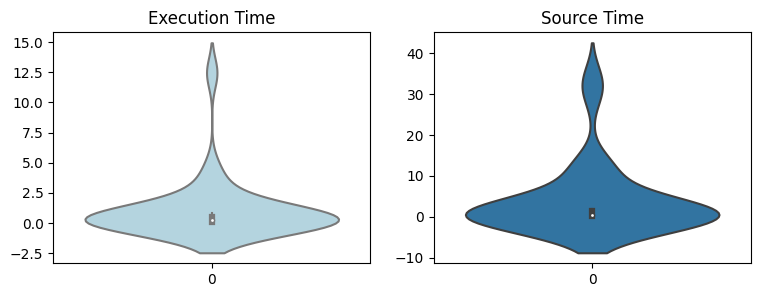

In [45]:
fig, ax = plt.subplots(1,2,figsize=(9,3))
sns.violinplot(dat['ExecTime'], ax=ax[0], color='lightblue')
ax[0].set_title("Execution Time")
sns.violinplot(dat['SourceTime'], ax=ax[1])
ax[1].set_title("Source Time")
plt.show()

## scatter plot for source time, trace time, execution time of plugins

<Figure size 300x300 with 0 Axes>

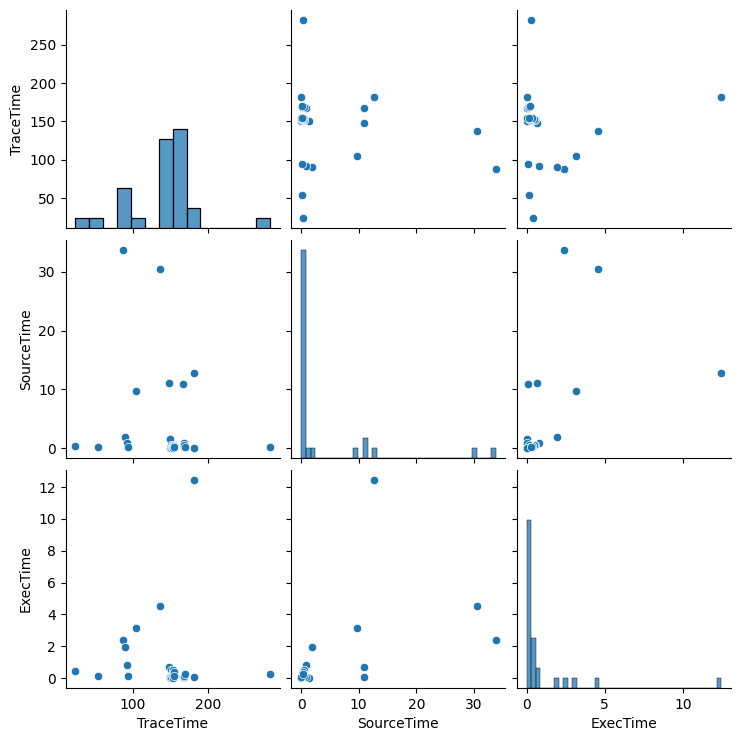

In [47]:
plt.figure(figsize=(3,3))
sns.pairplot(dat)
plt.show()

## top plugins by execution time

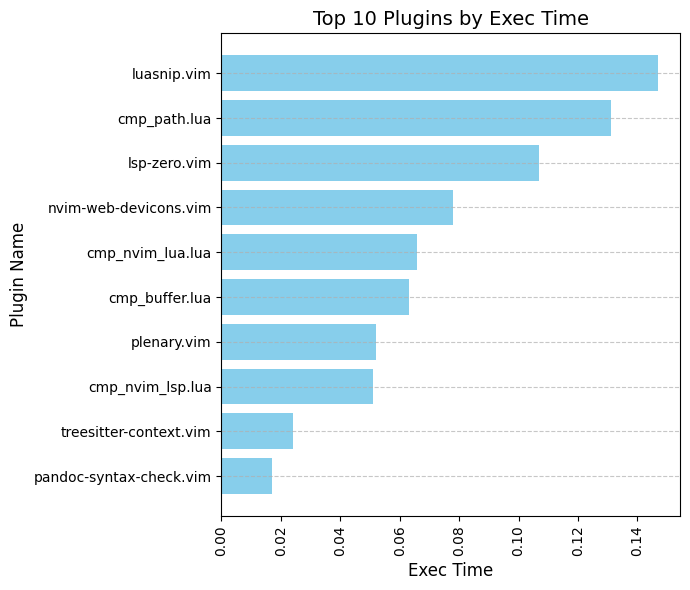

In [24]:
plt.figure(figsize=(7, 6))
plt.barh(top_10["PluginName"], top_10["ExecTime"], color="skyblue")
plt.ylabel("Plugin Name", fontsize=12)
plt.xlabel("Exec Time", fontsize=12)
plt.title("Top 10 Plugins by Exec Time", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()



## Top plugins by source time

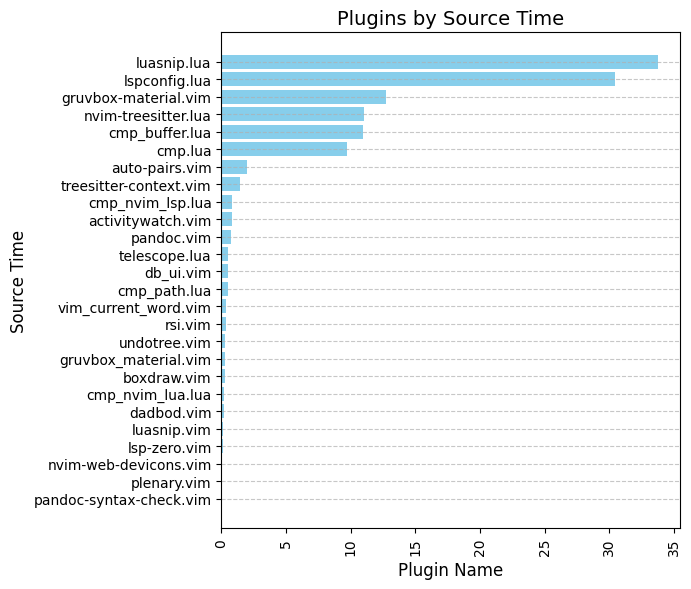

In [49]:
plt.figure(figsize=(7, 6))
plt.barh(dat_s_sorted["PluginName"], dat_s_sorted["SourceTime"], color="skyblue")
plt.xlabel("Plugin Name", fontsize=12)
plt.ylabel("Source Time", fontsize=12)
plt.title("Plugins by Source Time", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()


## composition 

In [50]:
# Prepare data for the pie chart
dat_n_sorted = dat_n.sort_values("ExecTime", ascending=False)
top_5 = dat_n_sorted.head(5)
sizes = top_5["ExecTime"]
labels=top_5["PluginName"]
colors = ["#2E5B88", "#497AA7", "#73A4CA", "#9FCAE6", "#B9DDF1"]
explode = [0.1] + [0] * (len(sizes) - 1)  # Explode the first slice for emphasis

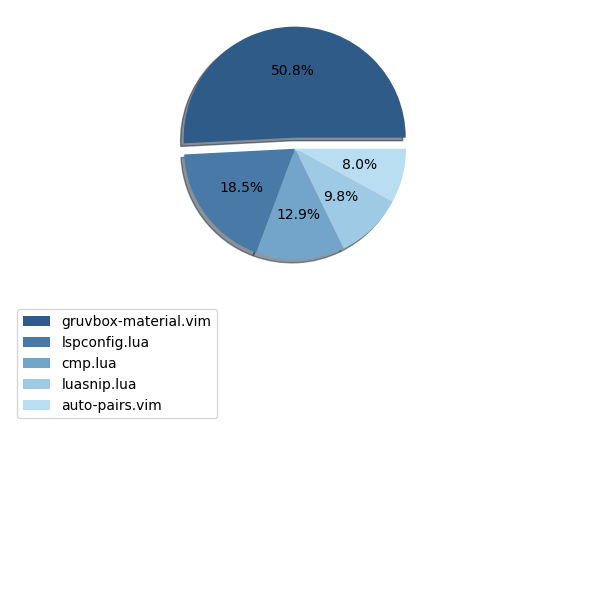

In [33]:
fig = plt.figure(4, figsize = (6,6))
ax = fig.add_subplot(211)
pie = ax.pie(sizes,startangle = 0, explode=explode, shadow = True, autopct = '%1.1f%%',colors = colors)
ax2 = fig.add_subplot(212)
ax2.axis("off")
ax2.legend(pie[0], labels,  loc="upper left")
plt.tight_layout()
